In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardekho_data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
num_col = ['Year','Selling_Price','Present_Price','Kms_Driven','Owner']

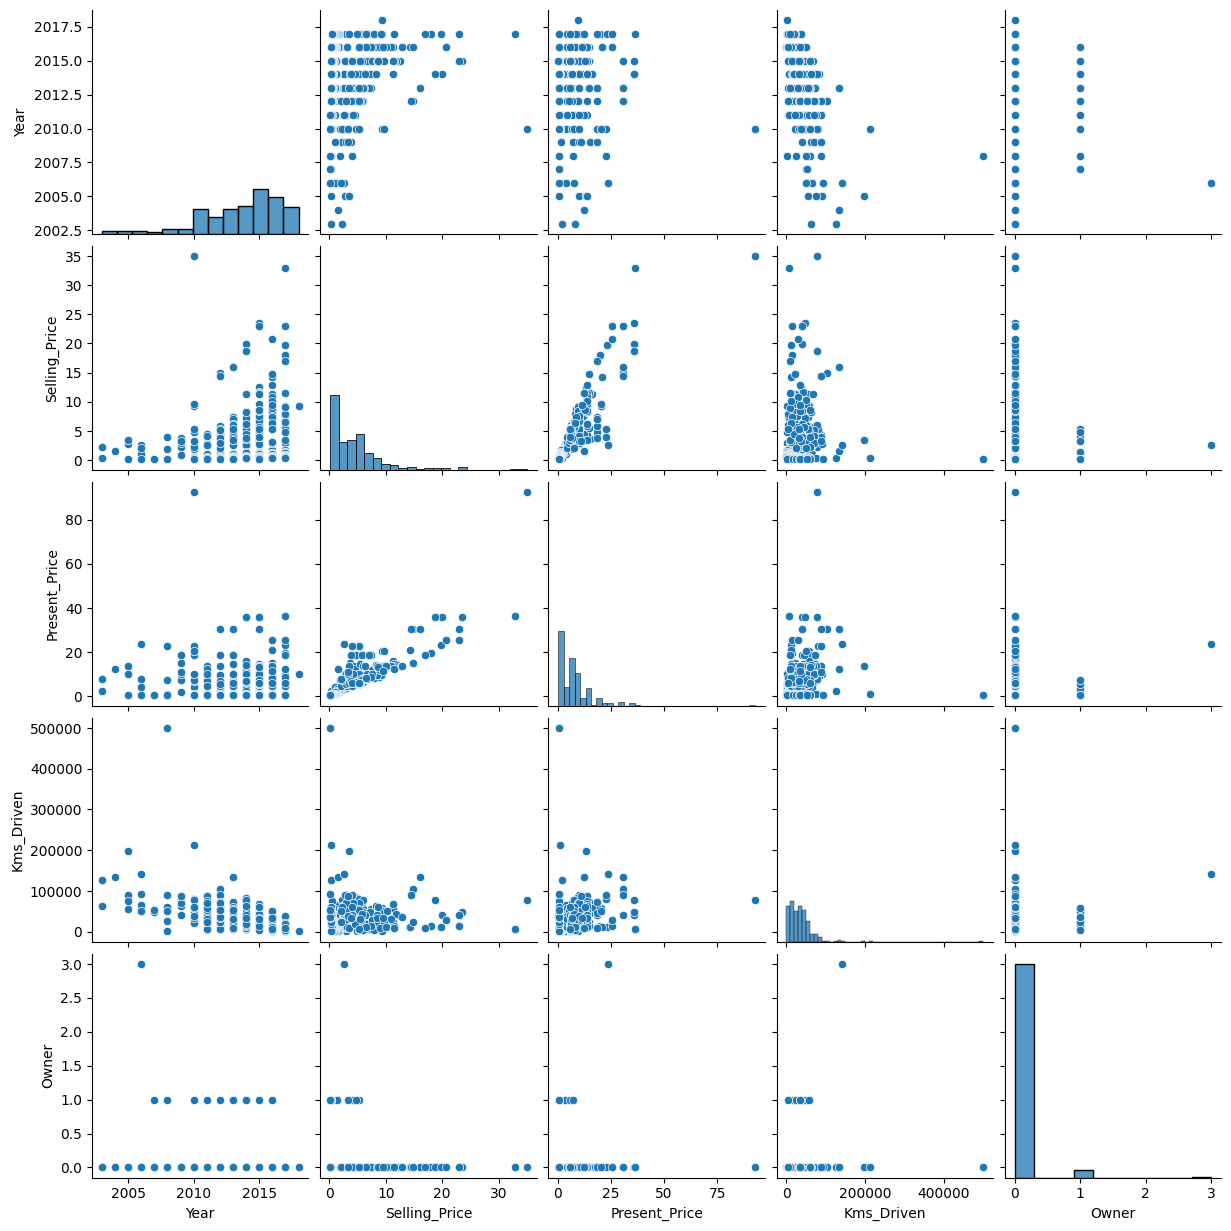

In [5]:
sns.pairplot(data[num_col])

<Axes: >

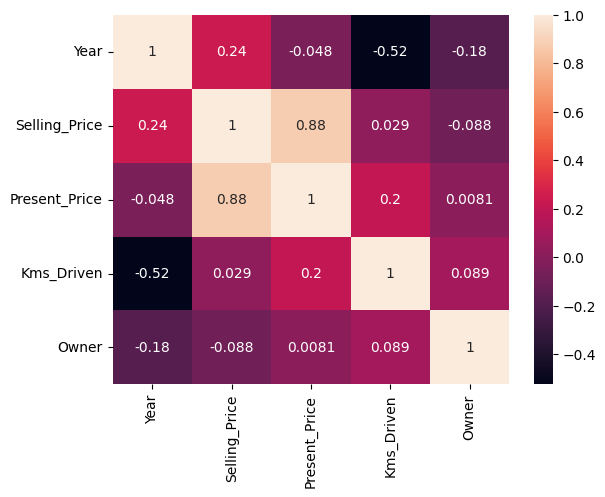

In [6]:
sns.heatmap(data[num_col].corr(),annot = True)

In [7]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission']

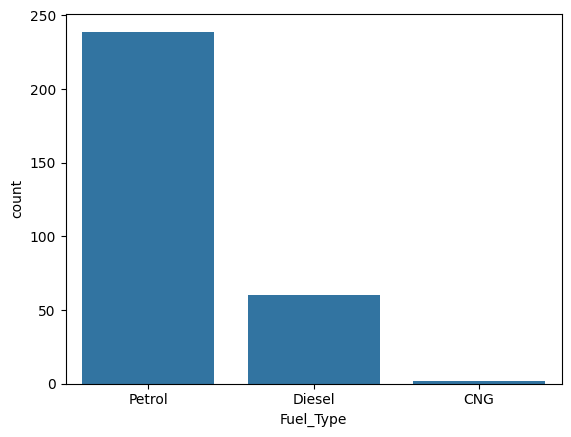

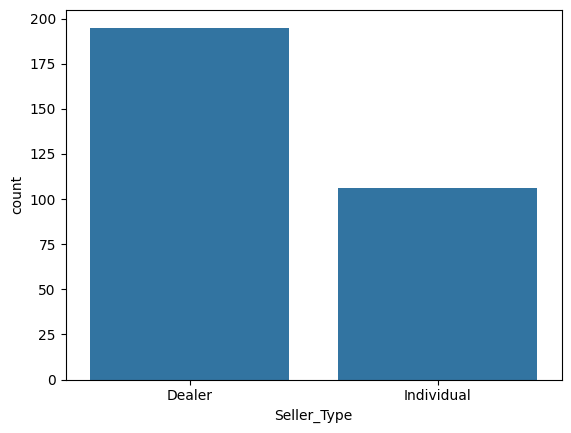

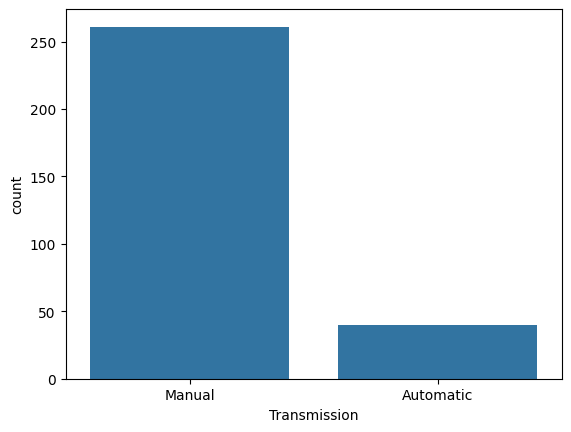

In [8]:
for i in cat_cols:
    sns.countplot(x=i,data=data)
    plt.show()
    

In [9]:
data.drop('Car_Name', axis = 1 , inplace = True)

In [10]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label = LabelEncoder()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [14]:
for i in data.select_dtypes(include = ['object']).columns:
    data[i] = label.fit_transform(data[i])

In [15]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [16]:
X = data.drop('Selling_Price', axis = 1 )
y = data['Selling_Price']

In [17]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test,y_pred)

0.956964606629304

In [25]:
param = {
    "n_estimators": [100,200,300,400,500],
    "max_depth": [None,5,10,15,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [26]:
random = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state = 42),
    param_distributions = param,
    n_iter = 20,
    cv = 3,
    n_jobs = -1,
    verbose = 1
)
random

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [27]:
random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [28]:
random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 15}

In [29]:
estimators = random.best_estimator_

In [30]:
y_best = estimators.predict(X_test)

In [31]:
r2_score(y_test,y_best)

0.9594217828198742

In [32]:
r2_score(y_test,y_pred)

0.956964606629304

In [33]:
import pickle


with open("model.pkl", "wb") as f:
    pickle.dump(model, f)